# Python数据分析（一）：快速入门

本系列是基于Python的数据分析入门教程，重点在数据分析的思想，Python只是工具，因此在整个系列中，数据分析相关的概念和思路会被更多地强调，Python及相关库本身的特性会被刻意弱化一些。本系列主要依赖是Python2.7.x、3.5.x或3.6.x，Numpy、Pandas、Matplotlib的最新版本。本系列假设读者已经有Python的基础知识。（在后续版本中，教程会进一步降低门槛，更加小白化。）

本讲是本系列的第一讲，主要是从一个完整的数据分析任务的视角概括地介绍数据分析需要的基本思想，并介绍相关的Python实现。

## 准备工作
### 版本说明

- Python版本：Python的大部分科学计算和数据分析相关库都是2和3兼容，返回结果大部分是一致的（极少数可能是Python2与3的数据类型的差别），建议选择2.7.9及以上的2.x版本或者3.5.x及以上的3.x版本。

- 相关库版本：相关库更新频率很快，尽量选择最新版本；文档参考最新官方文档和change log。

- Windows下载：相关库大多基于Cython，如果无法正常使用pip或者easy_install下载，请参考 https://zhuanlan.zhihu.com/p/21380755?refer=xmucpp 。

In [1]:
import sys
sys.version

'2.7.13 (default, Dec 18 2016, 07:03:39) \n[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]'

### 相关库

数据分析的主要底层库主要有以下几个：

- numpy: Python科学计算库的底层，提供narray数组及整套相关操作；

- pandas: Python的数据操作和数据分析的基本库，提供DataFrame及整套相关操作；

- matplotlib.pyplot: Python可视化的底层库，提供一套数据可视化工具。

In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats
import statsmodels
import statsmodels.api as sm

In [15]:
# 主要依赖库版本信息
print("""
NumPy版本：{np}
Pandas版本：{pd}
Matplotlib版本：{plt}
SciPy版本：{sp}
StatsModels版本：{sm}
""".format(np = np.__version__, 
           pd = pd.__version__, 
           plt = matplotlib.__version__,
           sp = scipy.__version__,
           sm = statsmodels.__version__
          )
     )


NumPy版本：1.12.1
Pandas版本：0.19.2
Matplotlib版本：1.5.3
SciPy版本：0.19.0
StatsModels版本：0.8.0



## 数据结构简介

好的数据分析工具，离不开好的数据结构和对应的算法实现。Python的NumPy和Pandas为我们提供的narray和DataFrame两大神器，让Python在数据分析工作中产生了强大的竞争力。

### numpy.array

numpy.array是numpy的基本结构，也是整个Python数据分析和科学计算相关库的底层结构。它是一个类似于MATLAB的n维数组，提供灵活的数组操作，其他大部分主流相关库（比如scipy，pandas等）都基于此结构构建。

In [4]:
array = np.array([[[1,2,3],[4,5,6],[6,7,7]]])
array

array([[[1, 2, 3],
        [4, 5, 6],
        [6, 7, 7]]])

In [5]:
array.ndim

3

In [6]:
array.shape

(1, 3, 3)

### pandas.DataFrame

pandas.DataFrame是模仿R的dataframe构建的，提供了数据操作需要的基本结构和各种基本属性和方法。它类似于一张SQL的表，是一个二维数组结构，基于numpy.array构建。

In [7]:
data = [[1,2],[3,4]]
df = pd.DataFrame(data, columns=['a','b'])
df

,a,b
0,1,2
1,3,4


## 数据清洗

在进行数据分析之前，数据清洗是必不可少的。数据清洗的核心思想，就是把非结构化的数据结构化，以更好地让人和计算机理解；把不整齐的数据弄整齐，让计算机在计算过程中遇到更少的麻烦。因此，数据清洗过程主要有以下几个重点：

- 数据加载：从文件或数据库中读入数据；
- 数据结构化：把非结构化、半结构化的数据（比如文本）结构化；
- 数据规整：把结构化的数据框（表）拼接、调整形状等；
- 数据筛选：按一定的条件挑选需要的数据；
- 数据转换：改变数据类型和数据格式，方便计算机计算或者人理解。

### 数据加载

In [10]:
# 从文件加载数据
df = pd.read_csv('data/sample1.csv')
df.head()

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
0,14985545685,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市,http://store.taobao.com/search.htm?user_number...,42000,6.6,6.19元/500g,38000
1,44466463444,【巧厨烘焙 】展艺精制白砂糖 幼砂糖西点细砂糖 家用调味品 400g,http://detail.tmall.com/item.htm?id=4446646344...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,25000,7.5,9.38元/500g,26000
2,15918515574,【天猫超市】舒可曼纯正白砂糖800g大包装碳化糖细白糖细砂幼砂糖,http://detail.tmall.com/item.htm?id=1591851557...,天猫超市,http://store.taobao.com/search.htm?user_number...,17000,12.5,7.82元/500g,11000
3,39863630205,【巧厨烘焙】太古糖白砂糖 细糖 细砂糖 纯正白砂糖 原装454克,http://detail.tmall.com/item.htm?id=3986363020...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,9990,9.8,10.79元/500g,9867
4,43331131373,【天猫超市】舒可曼糖霜 250g特细糖粉 烘焙原料面包饼干蛋糕装饰,http://detail.tmall.com/item.htm?id=4333113137...,天猫超市,http://store.taobao.com/search.htm?user_number...,5966,12.0,24.00元/500g,3854


In [11]:
# 写入文件
df.to_csv('data/sample1.csv',index=False)

### 数据结构化

In [12]:
f = open('zhihu.txt')
zhihu_data = f.read().decode('utf-8')

In [16]:
from collections import Counter
import jieba

series = pd.Series(Counter(jieba.cut(zhihu_data)),name='fudelei').sort_values(ascending=False)
series.head(10)

\n    53
，     51
的     24
。     13
了      9
       8
/      8
工作     8
：      8
）      8
Name: fudelei, dtype: int64

### 数据规整

In [17]:
df4 = pd.read_csv('data/sample4.csv')
df5 = pd.read_csv('data/sample5.csv')

In [18]:
df4.head()

,goodsID,shopName,shopID,sales,price,comments
0,536173335503,码头鲜生旗舰店,2938575849,56,89.0,49.0
1,541516970594,翼贝食品专营店,1909936037,2,19.0,6.0
2,19851555855,参情无限旗舰店,1048126684,4,298.0,8.0
3,536838511664,码头鲜生旗舰店,2938575849,0,99.0,61.0
4,544056740523,天猫超市生鲜店,1910146537,93,36.9,22.0


In [19]:
df5.head()

,goodsID,goodsName
0,536173335503,码头鲜生马来野生海捕石斑鱼黑虎斑500g一条装 龙虎斑 去腮去内脏
1,541516970594,花斑鲽500g 海鲜水产花斑鲽鱼 新鲜冷冻花斑蝶鱼鲜活斑鱼
2,19851555855,参情无限 印度洋东星斑鱼1000克鲜活海鲜水产新鲜冷冻石斑鱼包邮
3,536838511664,码头鲜生马来野生海捕石斑鱼黑虎斑600g一条装 龙虎斑 去腮去内脏
4,544056740523,【天猫超市】Joyfish清蒸阿拉斯加红石斑1条(400-500g)


In [21]:
# merge
pd.merge(df4,df5, on='goodsID').head()

,goodsID,shopName,shopID,sales,price,comments,goodsName
0,536173335503,码头鲜生旗舰店,2938575849,56,89.0,49.0,码头鲜生马来野生海捕石斑鱼黑虎斑500g一条装 龙虎斑 去腮去内脏
1,541516970594,翼贝食品专营店,1909936037,2,19.0,6.0,花斑鲽500g 海鲜水产花斑鲽鱼 新鲜冷冻花斑蝶鱼鲜活斑鱼
2,19851555855,参情无限旗舰店,1048126684,4,298.0,8.0,参情无限 印度洋东星斑鱼1000克鲜活海鲜水产新鲜冷冻石斑鱼包邮
3,536838511664,码头鲜生旗舰店,2938575849,0,99.0,61.0,码头鲜生马来野生海捕石斑鱼黑虎斑600g一条装 龙虎斑 去腮去内脏
4,544056740523,天猫超市生鲜店,1910146537,93,36.9,22.0,【天猫超市】Joyfish清蒸阿拉斯加红石斑1条(400-500g)


In [ ]:
df3 = pd.read_csv('data/sample3.csv')
df4 = df3.drop('goodsName',axis=1)
df4.to_csv('data/sample4.csv',index=False)
df5 = df3[['goodsID','goodsName']]
df5.to_csv('data/sample5.csv',index=False)
df6 = pd.concat([df3, df3])
df6.to_csv('data/sample6.csv',index=False)

In [22]:
df1 = pd.read_csv('data/sample1.csv')
df1.head()

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
0,14985545685,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市,http://store.taobao.com/search.htm?user_number...,42000,6.6,6.19元/500g,38000
1,44466463444,【巧厨烘焙 】展艺精制白砂糖 幼砂糖西点细砂糖 家用调味品 400g,http://detail.tmall.com/item.htm?id=4446646344...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,25000,7.5,9.38元/500g,26000
2,15918515574,【天猫超市】舒可曼纯正白砂糖800g大包装碳化糖细白糖细砂幼砂糖,http://detail.tmall.com/item.htm?id=1591851557...,天猫超市,http://store.taobao.com/search.htm?user_number...,17000,12.5,7.82元/500g,11000
3,39863630205,【巧厨烘焙】太古糖白砂糖 细糖 细砂糖 纯正白砂糖 原装454克,http://detail.tmall.com/item.htm?id=3986363020...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,9990,9.8,10.79元/500g,9867
4,43331131373,【天猫超市】舒可曼糖霜 250g特细糖粉 烘焙原料面包饼干蛋糕装饰,http://detail.tmall.com/item.htm?id=4333113137...,天猫超市,http://store.taobao.com/search.htm?user_number...,5966,12.0,24.00元/500g,3854


In [23]:
df2 = pd.read_csv('data/sample2.csv')
df2.head()

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
0,540395660668,【天猫超市】红棉食糖方糖454g/盒*2咖啡伴侣调糖白糖每盒120粒,http://detail.tmall.com/item.htm?id=5403956606...,天猫超市,http://store.taobao.com/search.htm?user_number...,250,19.2,13.77元/500g,39
1,520304659943,包邮买3送1 安琪百钻优级绵白糖 食用白糖 绵砂糖 烘焙调味 400g,http://detail.tmall.com/item.htm?id=5203046599...,嘉然食品专营店,http://store.taobao.com/search.htm?user_number...,250,7.3,9.13元/500g,262
2,520555206122,安琪百钻精幼砂糖 烘焙细砂糖白砂糖 冲饮食用白糖烘培原料400g,http://detail.tmall.com/item.htm?id=5205552061...,安琪酵母旗舰店,http://store.taobao.com/search.htm?user_number...,232,9.5,11.88元/500g,443
3,528043879271,烘焙原料 大卫贝克优质细砂糖 白砂糖食糖西点饼干用 幼砂糖400g,http://detail.tmall.com/item.htm?id=5280438792...,购美食品专营店,http://store.taobao.com/search.htm?user_number...,227,6.8,8.50元/500g,134
4,40141612623,烘焙原料 太古糖白砂糖 细砂糖幼砂糖 蛋糕面包饼干用 原装454g,http://detail.tmall.com/item.htm?id=4014161262...,范美焙亲食品专营店,http://store.taobao.com/search.htm?user_number...,224,8.0,8.81元/500g,548


In [24]:
# concat
pd.concat([df1,df2]).head()

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
0,14985545685,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市,http://store.taobao.com/search.htm?user_number...,42000,6.6,6.19元/500g,38000
1,44466463444,【巧厨烘焙 】展艺精制白砂糖 幼砂糖西点细砂糖 家用调味品 400g,http://detail.tmall.com/item.htm?id=4446646344...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,25000,7.5,9.38元/500g,26000
2,15918515574,【天猫超市】舒可曼纯正白砂糖800g大包装碳化糖细白糖细砂幼砂糖,http://detail.tmall.com/item.htm?id=1591851557...,天猫超市,http://store.taobao.com/search.htm?user_number...,17000,12.5,7.82元/500g,11000
3,39863630205,【巧厨烘焙】太古糖白砂糖 细糖 细砂糖 纯正白砂糖 原装454克,http://detail.tmall.com/item.htm?id=3986363020...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,9990,9.8,10.79元/500g,9867
4,43331131373,【天猫超市】舒可曼糖霜 250g特细糖粉 烘焙原料面包饼干蛋糕装饰,http://detail.tmall.com/item.htm?id=4333113137...,天猫超市,http://store.taobao.com/search.htm?user_number...,5966,12.0,24.00元/500g,3854


### 数据筛选

In [25]:
df1

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
0,14985545685,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市,http://store.taobao.com/search.htm?user_number...,42000,6.6,6.19元/500g,38000
1,44466463444,【巧厨烘焙 】展艺精制白砂糖 幼砂糖西点细砂糖 家用调味品 400g,http://detail.tmall.com/item.htm?id=4446646344...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,25000,7.5,9.38元/500g,26000
2,15918515574,【天猫超市】舒可曼纯正白砂糖800g大包装碳化糖细白糖细砂幼砂糖,http://detail.tmall.com/item.htm?id=1591851557...,天猫超市,http://store.taobao.com/search.htm?user_number...,17000,12.5,7.82元/500g,11000
3,39863630205,【巧厨烘焙】太古糖白砂糖 细糖 细砂糖 纯正白砂糖 原装454克,http://detail.tmall.com/item.htm?id=3986363020...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,9990,9.8,10.79元/500g,9867
4,43331131373,【天猫超市】舒可曼糖霜 250g特细糖粉 烘焙原料面包饼干蛋糕装饰,http://detail.tmall.com/item.htm?id=4333113137...,天猫超市,http://store.taobao.com/search.htm?user_number...,5966,12.0,24.00元/500g,3854
5,41702383371,【天猫超市】红棉食糖一级白砂糖808g/袋白糖粗砂糖食糖碳化糖,http://detail.tmall.com/item.htm?id=4170238337...,天猫超市,http://store.taobao.com/search.htm?user_number...,5865,11.8,7.30元/500g,5212
6,525290382664,【天猫超市】舒可曼白砂糖1000g 一级白糖砂糖调味品烹饪大包装,http://detail.tmall.com/item.htm?id=5252903826...,天猫超市,http://store.taobao.com/search.htm?user_number...,4489,25.8,12.90元/500g,2294
7,26306816294,舒可曼优质细砂糖 白砂糖烘焙原料 面包饼干材料打发用 400g,http://detail.tmall.com/item.htm?id=2630681629...,乐众食品专营店,http://store.taobao.com/search.htm?user_number...,4454,7.0,8.75元/500g,9080
8,539911953241,【天猫超市】舒可曼小粒黄冰糖400g*2包传统老冰糖冲饮调味,http://detail.tmall.com/item.htm?id=5399119532...,天猫超市,http://store.taobao.com/search.htm?user_number...,3560,17.6,11.00元/500g,911
9,42083096082,【巧厨烘焙】太古白砂糖 细糖 细砂糖 蛋糕面包饼干原料 原装1kg,http://detail.tmall.com/item.htm?id=4208309608...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,3401,19.8,9.90元/500g,3873


In [26]:
df1[df1['price']>20]

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
6,525290382664,【天猫超市】舒可曼白砂糖1000g 一级白糖砂糖调味品烹饪大包装,http://detail.tmall.com/item.htm?id=5252903826...,天猫超市,http://store.taobao.com/search.htm?user_number...,4489,25.8,12.90元/500g,2294
20,18507600771,蜜福堂木糖醇代糖 烘焙原料饼干500g无糖甜味剂白砂糖 木糖醇食品,http://detail.tmall.com/item.htm?id=1850760077...,美联食品专营店,http://store.taobao.com/search.htm?user_number...,1716,23.0,23.00元/500g,6559
31,536613533939,阿鹏哥白砂糖8斤烘焙原料手工甘蔗中颗细砂糖袋4000g包邮白糖批发,http://detail.tmall.com/item.htm?id=5366135339...,特鹏食品专营店,http://store.taobao.com/search.htm?user_number...,963,39.2,4.90元/500g,863
37,537815368957,【天猫超市】SUGARMAN/舒可曼一级白砂糖1000g*2包装白糖烹饪调味,http://detail.tmall.com/item.htm?id=5378153689...,天猫超市,http://store.taobao.com/search.htm?user_number...,677,26.8,6.23元/500g,294
48,531223828362,【天猫超市】舒可曼优质白砂糖800g 细砂糖白糖面包饼干烘焙原料,http://detail.tmall.com/item.htm?id=5312238283...,天猫超市,http://store.taobao.com/search.htm?user_number...,473,24.9,15.57元/500g,188
49,42866065762,【天猫超市】红棉咖啡糖包白砂糖包7g*250包咖啡伴侣调糖白糖包,http://detail.tmall.com/item.htm?id=4286606576...,天猫超市,http://store.taobao.com/search.htm?user_number...,456,25.0,7.14元/500g,404
54,36005505455,蜜福堂木糖醇食品 木糖醇代糖 无糖食品烘焙蛋糕点饼干白砂糖500g,http://detail.tmall.com/item.htm?id=3600550545...,美联食品专营店,http://store.taobao.com/search.htm?user_number...,311,28.0,28.00元/500g,2805
59,41323698923,【天猫超市】川崎元贞糖500g无糖食品烘焙代糖替代木糖醇白砂糖,http://detail.tmall.com/item.htm?id=4132369892...,天猫超市,http://store.taobao.com/search.htm?user_number...,250,29.0,29.00元/500g,463


### 数据转换

In [27]:
# 重复值
df6 = pd.read_csv('data/sample6.csv')
df6.count()

goodsID      80
goodsName    80
shopName     80
shopID       80
sales        80
price        80
comments     68
dtype: int64

In [30]:
df66 = df6.drop_duplicates()
df66.count()

goodsID      40
goodsName    40
shopName     40
shopID       40
sales        40
price        40
comments     34
dtype: int64

In [32]:
# 异常值
df1['price'].describe()

count    60.000000
mean     12.935000
std       7.224437
min       5.800000
25%       7.000000
50%      10.200000
75%      16.250000
max      39.200000
Name: price, dtype: float64

In [34]:
df11=df1[df1['price']<30]
df11.count()

goodsID          59
goodsName        59
goodsURL         59
shopName         59
shopURL          59
monthly_sales    59
price            59
price_ave        59
comments         59
dtype: int64

In [38]:
df3 = pd.read_csv('data/sample3.csv')

In [39]:
# 缺失值
df3[df3['comments'].isnull()]

,goodsID,goodsName,shopName,shopID,sales,price,comments
16,544229158966,欧帆 野生红石斑鱼450g 新鲜石斑鱼 深海捕捞 去腮去内脏 生鲜,语海食品专营店,2924225456,0,39.0,NaN
35,546259343906,玮世 野生石斑鱼 青斑鱼鲜活 深海海捕海鲜新鲜1000克/条包邮顺丰,玮世旗舰店,3000032262,0,168.0,NaN
36,544516430552,金丝斑,深海800米旗舰店,3023168933,0,45.0,NaN
37,525465870388,【尊尊】海鲜冻品加拿大深海野生红石斑鱼鱼头200-300G,尊尊旗舰店,2525881433,0,18.0,NaN
38,546919162905,野生海鲜新鲜海参斑鱼吃海参的鱼美容鱼6斤起拍10斤多省包邮,聚亿鲜旗舰店,3110386439,0,14.9,NaN
39,547738143427,650-700g/条 老虎斑鲜活野生海鲜石斑鱼龙胆鱼清斑鱼活体水产鱼类,鲜玛特旗舰店,2766569983,0,148.0,NaN


In [42]:
df3.fillna(0).tail()

,goodsID,goodsName,shopName,shopID,sales,price,comments
35,546259343906,玮世 野生石斑鱼 青斑鱼鲜活 深海海捕海鲜新鲜1000克/条包邮顺丰,玮世旗舰店,3000032262,0,168.0,0.0
36,544516430552,金丝斑,深海800米旗舰店,3023168933,0,45.0,0.0
37,525465870388,【尊尊】海鲜冻品加拿大深海野生红石斑鱼鱼头200-300G,尊尊旗舰店,2525881433,0,18.0,0.0
38,546919162905,野生海鲜新鲜海参斑鱼吃海参的鱼美容鱼6斤起拍10斤多省包邮,聚亿鲜旗舰店,3110386439,0,14.9,0.0
39,547738143427,650-700g/条 老虎斑鲜活野生海鲜石斑鱼龙胆鱼清斑鱼活体水产鱼类,鲜玛特旗舰店,2766569983,0,148.0,0.0


In [44]:
df33 = df3.dropna()
df33.count()

goodsID      34
goodsName    34
shopName     34
shopID       34
sales        34
price        34
comments     34
dtype: int64

In [45]:
df1

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
0,14985545685,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市,http://store.taobao.com/search.htm?user_number...,42000,6.6,6.19元/500g,38000
1,44466463444,【巧厨烘焙 】展艺精制白砂糖 幼砂糖西点细砂糖 家用调味品 400g,http://detail.tmall.com/item.htm?id=4446646344...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,25000,7.5,9.38元/500g,26000
2,15918515574,【天猫超市】舒可曼纯正白砂糖800g大包装碳化糖细白糖细砂幼砂糖,http://detail.tmall.com/item.htm?id=1591851557...,天猫超市,http://store.taobao.com/search.htm?user_number...,17000,12.5,7.82元/500g,11000
3,39863630205,【巧厨烘焙】太古糖白砂糖 细糖 细砂糖 纯正白砂糖 原装454克,http://detail.tmall.com/item.htm?id=3986363020...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,9990,9.8,10.79元/500g,9867
4,43331131373,【天猫超市】舒可曼糖霜 250g特细糖粉 烘焙原料面包饼干蛋糕装饰,http://detail.tmall.com/item.htm?id=4333113137...,天猫超市,http://store.taobao.com/search.htm?user_number...,5966,12.0,24.00元/500g,3854
5,41702383371,【天猫超市】红棉食糖一级白砂糖808g/袋白糖粗砂糖食糖碳化糖,http://detail.tmall.com/item.htm?id=4170238337...,天猫超市,http://store.taobao.com/search.htm?user_number...,5865,11.8,7.30元/500g,5212
6,525290382664,【天猫超市】舒可曼白砂糖1000g 一级白糖砂糖调味品烹饪大包装,http://detail.tmall.com/item.htm?id=5252903826...,天猫超市,http://store.taobao.com/search.htm?user_number...,4489,25.8,12.90元/500g,2294
7,26306816294,舒可曼优质细砂糖 白砂糖烘焙原料 面包饼干材料打发用 400g,http://detail.tmall.com/item.htm?id=2630681629...,乐众食品专营店,http://store.taobao.com/search.htm?user_number...,4454,7.0,8.75元/500g,9080
8,539911953241,【天猫超市】舒可曼小粒黄冰糖400g*2包传统老冰糖冲饮调味,http://detail.tmall.com/item.htm?id=5399119532...,天猫超市,http://store.taobao.com/search.htm?user_number...,3560,17.6,11.00元/500g,911
9,42083096082,【巧厨烘焙】太古白砂糖 细糖 细砂糖 蛋糕面包饼干原料 原装1kg,http://detail.tmall.com/item.htm?id=4208309608...,巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,3401,19.8,9.90元/500g,3873


In [46]:
# 元素级转换
df1['price_ave'].map(lambda x:float(x.split('元')[0])).head()

0     6.19
1     9.38
2     7.82
3    10.79
4    24.00
Name: price_ave, dtype: float64

In [ ]:
# 离散化

In [ ]:
# 计算指标变量

In [ ]:
# 时间变量

In [ ]:
# 字符串

## 数据分析

数据分析通常是由浅入深的，从数据的表层的特征和结构到变量之间深入关系一步一步探索。所谓的表层特征，指的是通过可视化可以看出的某个变量的分布、变量与变量之间的关系，或者由描述统计可以看出的整体统计学特征，或者由分组加总可以看出的分组特征；所谓的深入关系，指的是通过各种各样的统计学、计量经济学、机器学习方法探究的变量与变量之间的相关关系和因果关系。数据分析过程主要包括：

- 数据可视化：通过图表可视化地展示变量本身的特征、变量与变量之间的关系；
- 描述统计：概括数据的基本统计学特征；
- 分组加总：分组探究数据的基本特征；
- 建模分析：基于模型分析变量与变量之间的关系。

### 数据可视化

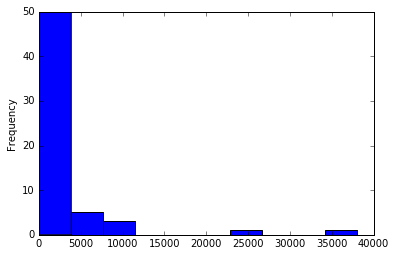

In [79]:
df1['comments'].plot.hist()

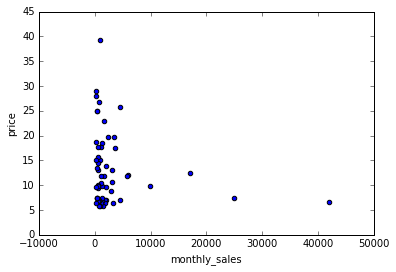

In [76]:
% matplotlib inline
df1.plot.scatter(x='monthly_sales',y='price')

### 描述统计

In [48]:
df1.count()

goodsID          60
goodsName        60
goodsURL         60
shopName         60
shopURL          60
monthly_sales    60
price            60
price_ave        60
comments         60
dtype: int64

In [49]:
df1.describe()

,goodsID,monthly_sales,price,comments
count,6.000000e+01,60.000000,60.000000,60.000000
mean,2.090157e+11,2939.466667,12.935000,3247.650000
std,2.373127e+11,6491.085090,7.224437,5978.098254
min,1.498555e+10,250.000000,5.800000,83.000000
25%,3.970727e+10,571.250000,7.000000,675.250000
50%,4.293506e+10,1134.500000,10.200000,1561.500000
75%,5.226777e+11,2141.250000,16.250000,2832.000000
max,5.403949e+11,42000.000000,39.200000,38000.000000


In [50]:
df1.mean()

goodsID          2.090157e+11
monthly_sales    2.939467e+03
price            1.293500e+01
comments         3.247650e+03
dtype: float64

In [51]:
df1.median()

goodsID          4.293506e+10
monthly_sales    1.134500e+03
price            1.020000e+01
comments         1.561500e+03
dtype: float64

In [52]:
df1.min()

goodsID                                                14985545685
goodsName                          3件包邮小粒黄冰糖多晶冰糖块400g老冰糖烘培料白砂糖红糖黑糖
goodsURL         http://detail.tmall.com/item.htm?id=1498554568...
shopName                                                   乐众食品专营店
shopURL          http://store.taobao.com/search.htm?user_number...
monthly_sales                                                  250
price                                                          5.8
price_ave                                              10.00元/500g
comments                                                        83
dtype: object

In [53]:
df1.max()

goodsID                                               540394892624
goodsName                        阿鹏哥白砂糖8斤烘焙原料手工甘蔗中颗细砂糖袋4000g包邮白糖批发
goodsURL         http://detail.tmall.com/item.htm?id=5403948926...
shopName                                                   阳光美橙旗舰店
shopURL          http://store.taobao.com/search.htm?user_number...
monthly_sales                                                42000
price                                                         39.2
price_ave                                               9.91元/500g
comments                                                     38000
dtype: object

In [54]:
df1.sum()

goodsID                                             12540944271508
goodsName        【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存【巧厨烘焙 】展艺精制白砂糖...
goodsURL         http://detail.tmall.com/item.htm?id=1498554568...
shopName         天猫超市巧厨食品专营店天猫超市巧厨食品专营店天猫超市天猫超市天猫超市乐众食品专营店天猫超市巧...
shopURL          http://store.taobao.com/search.htm?user_number...
monthly_sales                                               176368
price                                                        776.1
price_ave        6.19元/500g9.38元/500g7.82元/500g10.79元/500g24.00...
comments                                                    194859
dtype: object

In [56]:
df1.prod()

goodsID                    inf
monthly_sales    3.222736e+185
price             2.240031e+63
comments         1.351039e+191
dtype: float64

In [55]:
df1.cumsum().head()

,goodsID,goodsName,goodsURL,shopName,shopURL,monthly_sales,price,price_ave,comments
0,14985545685,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市,http://store.taobao.com/search.htm?user_number...,42000,6.6,6.19元/500g,38000
1,59452009129,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存【巧厨烘焙 】展艺精制白砂糖...,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,67000,14.1,6.19元/500g9.38元/500g,64000
2,75370524703,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存【巧厨烘焙 】展艺精制白砂糖...,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市巧厨食品专营店天猫超市,http://store.taobao.com/search.htm?user_number...,84000,26.6,6.19元/500g9.38元/500g7.82元/500g,75000
3,115234154908,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存【巧厨烘焙 】展艺精制白砂糖...,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市巧厨食品专营店天猫超市巧厨食品专营店,http://store.taobao.com/search.htm?user_number...,93990,36.4,6.19元/500g9.38元/500g7.82元/500g10.79元/500g,84867
4,158565286281,【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存【巧厨烘焙 】展艺精制白砂糖...,http://detail.tmall.com/item.htm?id=1498554568...,天猫超市巧厨食品专营店天猫超市巧厨食品专营店天猫超市,http://store.taobao.com/search.htm?user_number...,99956,48.4,6.19元/500g9.38元/500g7.82元/500g10.79元/500g24.00...,88721


In [57]:
df1['price'].cumprod().head()

0        6.60
1       49.50
2      618.75
3     6063.75
4    72765.00
Name: price, dtype: float64

### 分组加总

In [64]:
grouped = df1.groupby(df1['price']>10)

In [65]:
grouped.describe()

goodsID  monthly_sales      price      comments
price                                                            
False count  3.000000e+01      30.000000  30.000000     30.000000
      mean   1.680671e+11    3665.500000   7.663333   4514.766667
      std    2.191918e+11    8615.800912   1.407978   7998.813174
      min    1.498555e+10     264.000000   5.800000    193.000000
      25%    3.939454e+10     590.500000   6.650000   1221.500000
      50%    4.280597e+10    1046.500000   7.000000   1969.500000
      75%    4.015720e+11    1990.750000   9.350000   3025.500000
      max    5.373854e+11   42000.000000  10.000000  38000.000000
True  count  3.000000e+01      30.000000  30.000000     30.000000
      mean   2.499644e+11    2213.433333  18.206667   1980.533333
      std    2.511222e+11    3224.693267   6.834090   2324.809473
      min    1.591836e+10     250.000000  10.400000     83.000000
      25%    4.032970e+10     522.750000  13.000000    487.000000
      50%    4.316759e+10    1134.500000  16.700000   1014.000000
      75%    5.303238e+11    2919.000000  22.200000   2379.500000
      max    5.403949e+11   17000.000000  39.200000  11000.000000

In [66]:
grouped.agg('mean')

,goodsID,monthly_sales,price,comments
price,,,,
False,1.680671e+11,3665.500000,7.663333,4514.766667
True,2.499644e+11,2213.433333,18.206667,1980.533333


In [67]:
grouped['price'].apply(np.mean)

price
False     7.663333
True     18.206667
Name: price, dtype: float64

In [68]:
for name,group in grouped:
    print(name)
    print(group)

False
         goodsID                            goodsName  \
0    14985545685     【天猫超市】舒可曼纯正白砂糖400g碳化工艺细白糖干爽带盖易保存   
1    44466463444   【巧厨烘焙 】展艺精制白砂糖 幼砂糖西点细砂糖 家用调味品 400g   
3    39863630205     【巧厨烘焙】太古糖白砂糖 细糖 细砂糖 纯正白砂糖 原装454克   
7    26306816294      舒可曼优质细砂糖 白砂糖烘焙原料 面包饼干材料打发用 400g   
10   44553585002      【品厨烘焙】展艺精制白砂糖幼砂糖西点特细砂糖 自然纯正400g   
13  522565124596     【天猫超市】太古 白砂糖 400g/袋 太古是居家旅行的上好选择   
15   37766738359    烘焙原料 精制舒可曼烘焙糖霜糖粉细砂糖400g原装 螺旋袋装白砂糖   
17   42835926801     【天猫超市】红棉食糖方糖454g/盒120粒装咖啡伴侣调糖白砂糖   
18   43512896067    舒可曼白砂糖 细砂糖幼砂糖烘焙专用 做蛋糕饼干白糖烘焙原料400g   
19   41764332235     【天猫超市】红棉食糖一级白砂糖454g/袋碳化糖白糖粗砂糖细砂糖   
22   15602091891  【天猫超市】太古优级白砂糖 300g/袋  食用糖 甜蜜滋味 健康美丽   
24  537385391711     【天猫超市】古福 白砂糖400g 食用白糖 烘培原料 厨房调味品   
25  521287974963     安琪百钻优级绵白糖400g食用白糖 超细绵砂糖优质棉糖 烘焙原料   
26   43914098592     太古白砂糖 细砂糖食用糖 蛋糕面包饼干打发用 烘焙原料 454g   
28  523015597397        可可西厨 大卫贝克 优质细砂糖 白砂糖 烘焙用糖 400g   
32   40136006635      圣家优质细砂糖做面包diy蛋糕幼砂糖白砂糖烘焙原料原装200g   
34  520647335508     烘焙原料

### 建模分析

In [69]:
# scipy.stats
stats.ttest_1samp(df1['price'],10)

Ttest_1sampResult(statistic=3.1468768775375571, pvalue=0.0025867647051277878)

In [70]:
# statsmodels
y = df1['monthly_sales']
x = sm.add_constant(df1['price'])
model = sm.OLS(y,x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          monthly_sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.483
Date:                Tue, 04 Jul 2017   Prob (F-statistic):              0.228
Time:                        22:06:44   Log-Likelihood:                -610.57
No. Observations:                  60   AIC:                             1225.
Df Residuals:                      58   BIC:                             1229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4774.6781   1722.573      2.772      0.007    1326.573    8222.783
price       -141.8795    116.497     -1.218      0.228    -375.074      91.315
==============================================================================
Omnibus:                       89.281   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.572
Skew:                           4.394   Prob(JB):                    2.12e-286
Kurtosis:                      24.190   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# sklearn.linear_model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df11['price'].values.reshape(len(df11['price']),1), df11['monthly_sales'])
reg.coef_

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([-161.53737709])

In [72]:
reg.intercept_

4990.5405623253664